## Procedure:     Uncertainty propagation for matrix-based LCA



### Method:        Monte Carlo simulation (normal random)

Author:        Evelyne Groen {evelyne [dot] groen [at] gmail [dot] com}

Last update:   28/09/2016 

In [64]:
import numpy as np 

A_det = np.matrix('10 0; -2 100') #A-matrix
B_det = np.matrix('1 10')         #B-matrix
f = np.matrix('1000; 0')          #Functional unit vector f

g_LCA = B_det * A_det.I * f 
print(g_LCA)                      #Deterministic result 


[[ 120.]]


### Monte Carlo simulation using normal distribution functions for all input parameters

The mean values are equal to the initial values of A and B. 
The standard deviation equals 5% of the mean of A and B. 

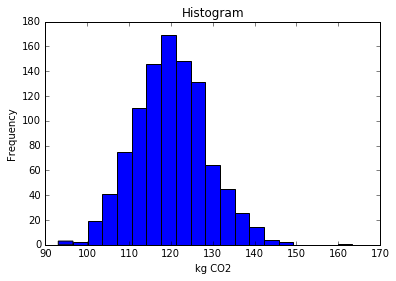

In [65]:
N = 1000                           #Sample size
CV = 0.05                        #Coefficient of variation (CV = sigma/mu)

import random

As = [random.normalvariate(A_det, CV*A_det) for i in range(0,N)]
Bs = [random.normalvariate(B_det, CV*B_det) for i in range(0,N)]
f  = np.matrix('1000; 0')

gs = [B * A.I * f for A, B in zip(As, Bs)]

g_list =[g[0,0] for g in gs]

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.hist(g_list,20)
plt.title("Histogram")
plt.xlabel("kg CO2")
plt.ylabel("Frequency")

fig = plt.gcf()
